## 국민연금 가입자 조회

In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

pd.set_option('display.float_format',  '{:.1f}'.format)
pd.set_option('display.max_columns', None)

plt.rcParams['font.family'] = "AppleGothic"

DATA_DIR = '.'


### 데이터 (국민연금공단_국민연금 가입 사업장 내역)

- 데이터셋 출처: 공공 데이터 포털(data.go.kr) **2022년 12월 19일 기준** 데이터
- 형태: 파일데이터 (csv)

사업장 컬럼별 상세설명

- 자료생성년월 → 자격마감일(사유발생일이 속하는 달의 다음달 15일)까지 신고분 반영
- 당월고지금액 → 국민연금법 시행령 제5조에 의거 기준소득월액 상한액 적용으로 실제소득과 고지금액은 상이할 수 있음

  - ■ 상한액 2019.7.~2020.6. 4,860,000원(2019.7.1.기준)
  - ■ 상한액 2020.7.~2021.6. 5,030,000원(2020.7.1.기준)
  - ■ 상한액 2021.7.~2022.6. 5,240,000원(2021.7.1.기준)

- 신규취득자수 → 납부재개 포함 : ※ 전달 고지대상자와 비교하므로 실제 취득자와 상이할 수 있음 (초일취득 (고지)초일이 아닌경우 (당월 미고지되며 다음달 취득자수에 반영)
- 상실가입자수 → 납부예외 포함 : ※ 전달 고지대상자와 비교하므로 실제 퇴사자와 상이할 수 있음 (초일이 아닌 상실자는 다음달 상실자수에 반영)

※ 국민연금법 제6조, 8조, 동법 시행령 제18조에 의거 60세 도달하거나 퇴직연금수급자, 조기노령연금 수급권을 취득한 자는 가입대상에서 제외되며, 18세미만, 기초수급자는 본인희망에 의해 제외될 수 있음

In [37]:
df = pd.read_csv(os.path.join(DATA_DIR, 'national-pension.csv'), encoding='cp949')
df.head(3)

,자료생성년월,사업장명,사업자등록번호,사업장가입상태코드 1 등록 2 탈퇴,우편번호,사업장지번상세주소,사업장도로명상세주소,고객법정동주소코드,고객행정동주소코드,법정동주소광역시도코드,법정동주소광역시시군구코드,법정동주소광역시시군구읍면동코드,사업장형태구분코드 1 법인 2 개인,사업장업종코드,사업장업종코드명,적용일자,재등록일자,탈퇴일자,가입자수,당월고지금액,신규취득자수,상실가입자수
0,2022-12,우성기전(주),126811,1,12816,경기도 광주시 도척면,경기도 광주시 도척면 도척윗로,4161033025,4161033025,41,610,330,1,292201,동력식 수지 공구 제조업,1988-01-01,NaN,NaN,4,899980,0,0
1,2022-12,서능공원묘지운영회(재),102820,1,11191,경기도 포천시 내촌면,,4165032022,4165032022,41,650,320,1,701700,화장터 운영 묘지 분양 및 관리업,1988-01-01,NaN,NaN,11,3278020,0,0
2,2022-12,노들새마을금고,108820,1,06923,서울특별시 동작구 노량진동,서울특별시 동작구 만양로,1159010100,1159051000,11,590,101,1,659202,신용조합,1988-01-01,NaN,NaN,12,4956440,0,0


원본 DataFrame을 다음의 컬럼명으로 변경하세요
- **삭제**로 표기된 컬럼은 삭제 합니다.



|                          변경 전 | 변경 후                 |
| -------------------------------: | ----------------------- |
|                     자료생성년월 | **삭제**                |
|                         사업장명 | 사업장명                |
|                   사업자등록번호 | 사업자등록번호          |
| 사업장가입상태코드 1 등록 2 탈퇴 | 가입상태                |
|                         우편번호 | **우편번호**            |
|               사업장지번상세주소 | **삭제**                |
|             사업장도로명상세주소 | 주소                    |
|               고객법정동주소코드 | **삭제**                |
|               고객행정동주소코드 | **삭제**                |
|           법정동주소광역시도코드 | 시도코드                |
|       법정동주소광역시시군구코드 | 시군구코드              |
| 법정동주소광역시시군구읍면동코드 | 읍면동코드              |
| 사업장형태구분코드 1 법인 2 개인 | **삭제**                |
|                   사업장업종코드 | 업종코드                |
|                 사업장업종코드명 | 업종코드명              |
|                         적용일자 | **삭제**                |
|                       재등록일자 | **삭제**                |
|                         탈퇴일자 | 탈퇴일자                |
|                         가입자수 | 가입자수                |
|                     당월고지금액 | 금액                    |
|                     신규취득자수 | 신규                    |
|                     상실가입자수 | 상실                    |



In [38]:
# 코드를 입력해 주세요
df.columns = [
    '자료생성년월', '사업장명', '사업자등록번호', '가입상태', '우편번호',
    '사업장지번상세주소', '주소', '고객법정동주소코드', '고객행정동주소코드', 
    '시도코드', '시군구코드', '읍면동코드', 
    '사업장형태구분코드 1 법인 2 개인', '업종코드', '업종코드명', 
    '적용일자', '재등록일자', '탈퇴일자',
    '가입자수', '금액', '신규', '상실'
]
df = df.drop(['자료생성년월', '우편번호', '사업장지번상세주소', '고객법정동주소코드', '고객행정동주소코드', '사업장형태구분코드 1 법인 2 개인', '적용일자', '재등록일자'], axis=1)
df.head()

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
0,우성기전(주),126811,1,경기도 광주시 도척면 도척윗로,41,610,330,292201,동력식 수지 공구 제조업,NaN,4,899980,0,0
1,서능공원묘지운영회(재),102820,1,,41,650,320,701700,화장터 운영 묘지 분양 및 관리업,NaN,11,3278020,0,0
2,노들새마을금고,108820,1,서울특별시 동작구 만양로,11,590,101,659202,신용조합,NaN,12,4956440,0,0
3,유창성업(주),122812,1,인천광역시 서구 갑문2로,28,260,119,749604,그 외 기타 분류 안된 사업 지원 서비스업(기타임가공,NaN,24,5371000,0,0
4,희성전자(주),106810,1,서울특별시 용산구 독서당로14길,11,170,131,701201,비주거용 건물 임대업(점포 자기땅),NaN,395,187943100,0,1


### 사업장명 클린징

- 다음의 예제을 확인한 후 아래 지시사항을 수행해 주세요

In [39]:
df.loc[df['사업장명'].str.contains('\(주\)')].head()

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
0,우성기전(주),126811,1,경기도 광주시 도척면 도척윗로,41,610,330,292201,동력식 수지 공구 제조업,NaN,4,899980,0,0
3,유창성업(주),122812,1,인천광역시 서구 갑문2로,28,260,119,749604,그 외 기타 분류 안된 사업 지원 서비스업(기타임가공,NaN,24,5371000,0,0
4,희성전자(주),106810,1,서울특별시 용산구 독서당로14길,11,170,131,701201,비주거용 건물 임대업(점포 자기땅),NaN,395,187943100,0,1
5,동성교역(주),120810,1,서울특별시 강남구 테헤란로87길,11,680,105,171109,화학섬유직물 직조업,NaN,4,1255560,0,0
6,(주)태평양그랜드,105815,1,경기도 파주시 직지길,41,480,115,222102,스크린 인쇄업,NaN,20,5787280,0,0


`우성기전(주)`에서 (주) 라는 글자는 제거하는 경우

In [40]:
# Regular Expression(정규화) 모듈 사용
import re

pattern1 = '(\([^)]+\))'
re.sub(pattern1, '', '우성기전(주)')

'우성기전'

사업장명에서 [] 특수문자를 포함하는 경우 []안쪽 글자까지 제거하는 경우

In [41]:
df.loc[df['사업장명'].str.contains('\[')].head()

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
115006,에스티테크[주],606817,1,부산광역시 사하구 감천항로419번길,26,380,107,291502,기타 물품 취급장비 제조업,NaN,11,3465060,0,0
161699,게스트하우스 [특별자활],206826,1,서울특별시 성동구 가람길,11,200,118,999999,BIZ_NO미존재사업장,NaN,13,1671340,2,7
163894,[주)한빛관리 은행대우 3차1단지/ 생활지원센타],212813,1,경기도 시흥시 은행로,41,390,106,702003,비주거용 부동산 관리업,NaN,3,728260,0,0
168743,비전트레이닝센터[자활사업],206826,1,서울특별시 성동구 자동차시장길,11,200,122,999999,BIZ_NO미존재사업장,NaN,7,467300,4,6
187304,바이오코리아[BIOKOREA],317826,1,충청북도 청주시 흥덕구 오송읍 오송생명2로,43,113,250,999999,BIZ_NO미존재사업장,NaN,3,584640,0,0


(예시) `에스티테크[주]`에서 [주]를 삭제 하고 싶은 경우

In [42]:
pattern2 = '(\[[^)]+\])'
re.sub(pattern2, '', '에스티테크[주]')

'에스티테크'

In [43]:
df.loc[df['사업장명'].str.contains('\/')].head(10)

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
1284,(주)동양/건재부문,101853,1,서울특별시 영등포구 국제금융로2길,11,560,110,269401,시멘트 제조업,NaN,300,128936960,3,4
4694,(주)한영파트너스FH/월드컵현대아파트,138810,1,서울특별시 서대문구 수색로,11,410,119,702003,비주거용 부동산 관리업,NaN,3,878660,0,0
18171,의료법인해정의료재단/더좋은병원,502821,1,대구광역시 수성구 명덕로,27,260,105,851101,요양병원,NaN,158,36442640,3,1
22815,안산시청(의료급여사례관리/장애인복지과),134830,1,경기도 안산시 단원구 화랑로,41,273,101,701201,비주거용 건물 임대업(점포 자기땅),NaN,6,1716880,0,0
23823,(주)영일에이치오엠/이동그린빌명품,506811,1,경상북도 포항시 남구 대이로,47,111,117,749300,건축물 일반 청소업,NaN,3,757240,0,0
25083,주/대명부품,204817,1,서울특별시 동대문구 한천로,11,230,105,503003,자동차 중고 부품 및 내장품 판매업,NaN,3,1132260,0,0
25632,열린노무법인/부산사무소,607851,1,부산광역시 부산진구 동평로,26,230,101,741109,기타 법무관련 서비스업,NaN,3,687960,1,0
26321,전용부품판매/주,204817,1,서울특별시 동대문구 전농로4길,11,230,105,503003,자동차 중고 부품 및 내장품 판매업,NaN,4,1106360,0,0
27793,중앙산업(자)/생활폐기물 수집운반 대행사업,138810,1,경기도 의왕시 부곡중앙북9길,41,430,103,900100,지정 외 폐기물 수집 운반업,NaN,17,7369540,0,14
29327,한우개발(자)/생활폐기물 수집운반 대행사업,138810,1,경기도 의왕시 오전천로,41,430,101,900100,지정 외 폐기물 수집 운반업,NaN,9,2117980,0,6


그 밖의 모든 특수문자는 제거합니다. (제거한 특수문자에는 공백을 삽입합니다)

In [44]:
pattern3 = '[^A-Za-z0-9가-힣]'
result = re.sub(pattern3, ' ', '*^%$^의료법인%해정^&*****%!@의료재단/더/좋은/병원')
result = re.sub(' +', ' ', result)
result

' 의료법인 해정 의료재단 더 좋은 병원'

In [45]:
# 검증코드 (변경전)
df.loc[[143146, 1284, 24109, 23092, 548425]]

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
143146,(주)유원건축사사무소,135811,1,경기도 용인시 처인구 중부대로,41,461,102,742105,건축 설계 및 관련 서비스업(건축사),NaN,125,41319640,3,1
1284,(주)동양/건재부문,101853,1,서울특별시 영등포구 국제금융로2길,11,560,110,269401,시멘트 제조업,NaN,300,128936960,3,4
24109,서천문화원,309820,1,충청남도 서천군 서천읍 화금서길,44,770,253,999999,BIZ_NO미존재사업장,NaN,3,778660,0,1
23092,(주)진양종합건설,214873,1,부산광역시 연제구 중앙대로,26,470,102,451101,아파트 건설업,NaN,3,887220,0,0
548425,（주）동아산업/일용/평택전자 P3 복합동 신축공사 중 금속공사,312812,1,경기도 평택시 삼성로,41,220,128,452102,유리 및 창호 공사업,NaN,4,1812600,4,0


위의 제공된 힌트를 참고하여 `사업장명` 컬럼에 대하여 다음 조건의 클린징을 적용해 주세요

1. `(주)` 와 같은 문자열은 ()안에 문자를 포함하여 일괄 제거합니다.
2. `[주식회사]`와 같이 [] 안에 문자열 포함하여 일괄 제거합니다.
3. `숫자`, `한글`, `영어`를 제외한 특수문자는 공백으로 대체 합니다. 만약 공백이 1개 이상이 들어간 경우는 1개로 대체합니다.

In [46]:
# 코드를 입력해 주세요
def preprocessing(x):
    x = re.sub(pattern1, '', x)
    x = re.sub(pattern2, '', x)
    x = re.sub(pattern3, ' ', x)
    x = re.sub(' +', ' ', x)
    return x

df['사업장명'] = df['사업장명'].apply(preprocessing)

In [47]:
# 검증코드
df.loc[[143146, 1284, 24109, 23092, 548425]]

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
143146,유원건축사사무소,135811,1,경기도 용인시 처인구 중부대로,41,461,102,742105,건축 설계 및 관련 서비스업(건축사),NaN,125,41319640,3,1
1284,동양 건재부문,101853,1,서울특별시 영등포구 국제금융로2길,11,560,110,269401,시멘트 제조업,NaN,300,128936960,3,4
24109,서천문화원,309820,1,충청남도 서천군 서천읍 화금서길,44,770,253,999999,BIZ_NO미존재사업장,NaN,3,778660,0,1
23092,진양종합건설,214873,1,부산광역시 연제구 중앙대로,26,470,102,451101,아파트 건설업,NaN,3,887220,0,0
548425,주 동아산업 일용 평택전자 P3 복합동 신축공사 중 금속공사,312812,1,경기도 평택시 삼성로,41,220,128,452102,유리 및 창호 공사업,NaN,4,1812600,4,0


## 분석

2022년도에 탈퇴한 기업의 월별 탈퇴 수를 bar그래프로 출력합니다.

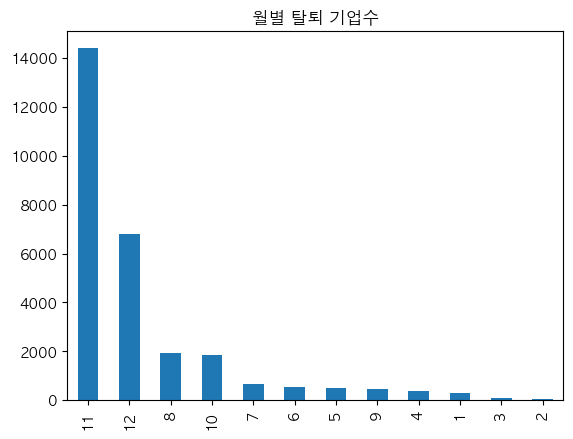

In [48]:
# 코드를 입력해 주세요
df['탈퇴일자_연도'] =  pd.to_datetime(df['탈퇴일자']).dt.year
df['탈퇴일자_월'] =  pd.to_datetime(df['탈퇴일자']).dt.month
df.loc[(df['가입상태'] == 2) & (df['탈퇴일자_연도'] == 2022), '탈퇴일자_월'].astype('int').value_counts().plot(kind='bar')
plt.title('월별 탈퇴 기업수')
plt.show()

2022년도에 탈퇴한 기업을 대상으로 시도별 탈퇴한 기업의 숫자를 bar 그래프로 출력하세요

In [51]:
df['주소'].str.split(' ').str[0]

0           경기도
1              
2         서울특별시
3         인천광역시
4         서울특별시
          ...  
550737         
550738         
550739         
550740         
550741         
Name: 주소, Length: 550742, dtype: object

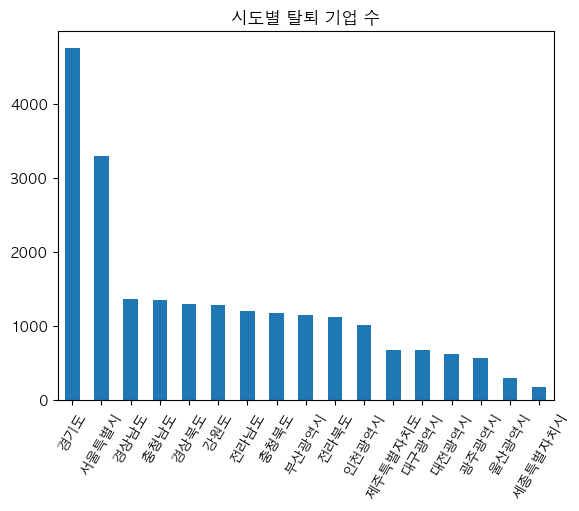

In [52]:
# 코드를 입력해 주세요
df['시도'] = df['주소'].str.split(' ').str[0]
df.loc[(df['가입상태'] == 2) & (df['탈퇴일자_연도'] == 2022) & (df['시도'].apply(lambda x: len(x.strip())) > 0), '시도'].value_counts().plot(kind='bar')
plt.title('시도별 탈퇴 기업 수')
plt.xticks(rotation=60)
plt.show()

탈퇴한 기업을 대상으로 상반기 / 하반기별 기업의 탈퇴 수를 비교합니다.
- 비교대상은 2017년 ~ 2021년을 기준으로 산정합니다.

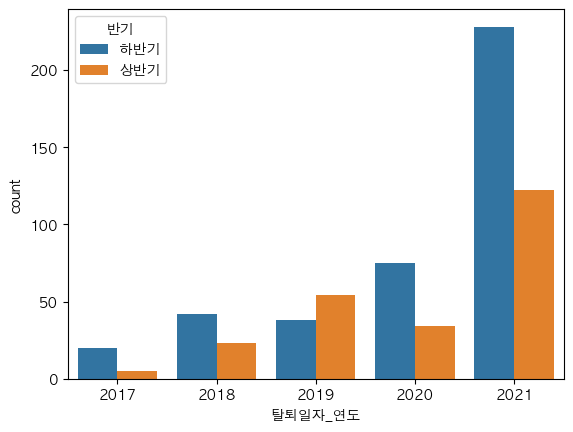

In [53]:
# 코드를 입력해 주세요
cond1 = (df['가입상태'] == 2) & (df['탈퇴일자_연도'] >= 2017) & (df['탈퇴일자_연도'] <= 2021)
tmp = df.loc[cond1].copy()
tmp['반기'] = np.where(tmp['탈퇴일자_월'] <= 6, '상반기', '하반기')
tmp['탈퇴일자_연도'] = tmp['탈퇴일자_연도'].astype('int')
sns.countplot(x='탈퇴일자_연도', hue='반기', data=tmp)
df = df.drop(['탈퇴일자_연도', '탈퇴일자_월','시도'], axis=1)
plt.show()

- `가입상태`가 2인 데이터는 삭제 합니다.
- `가입상태`, `탈퇴일자` 컬럼을 제거하세요.

In [54]:
# 코드를 입력해 주세요
df = df.loc[df['가입상태'] == 1].drop(['가입상태', '탈퇴일자'], axis=1).reset_index(drop=True)
print(f'shape: {df.shape[0]} 행')
df.head()

shape: 522066 행


,사업장명,사업자등록번호,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,가입자수,금액,신규,상실
0,우성기전,126811,경기도 광주시 도척면 도척윗로,41,610,330,292201,동력식 수지 공구 제조업,4,899980,0,0
1,서능공원묘지운영회,102820,,41,650,320,701700,화장터 운영 묘지 분양 및 관리업,11,3278020,0,0
2,노들새마을금고,108820,서울특별시 동작구 만양로,11,590,101,659202,신용조합,12,4956440,0,0
3,유창성업,122812,인천광역시 서구 갑문2로,28,260,119,749604,그 외 기타 분류 안된 사업 지원 서비스업(기타임가공,24,5371000,0,0
4,희성전자,106810,서울특별시 용산구 독서당로14길,11,170,131,701201,비주거용 건물 임대업(점포 자기땅),395,187943100,0,1


## 핵심 데이터 column 추출

- 수도권(서울, 경기도) 소재의 기업을 대상으로 합니다.
- `가입자수`를 기준으로 내림차순 정렬하여 bar 그래프를 출력합니다.
- 출력되는 사업장명은 상위 20개만 출력합니다.

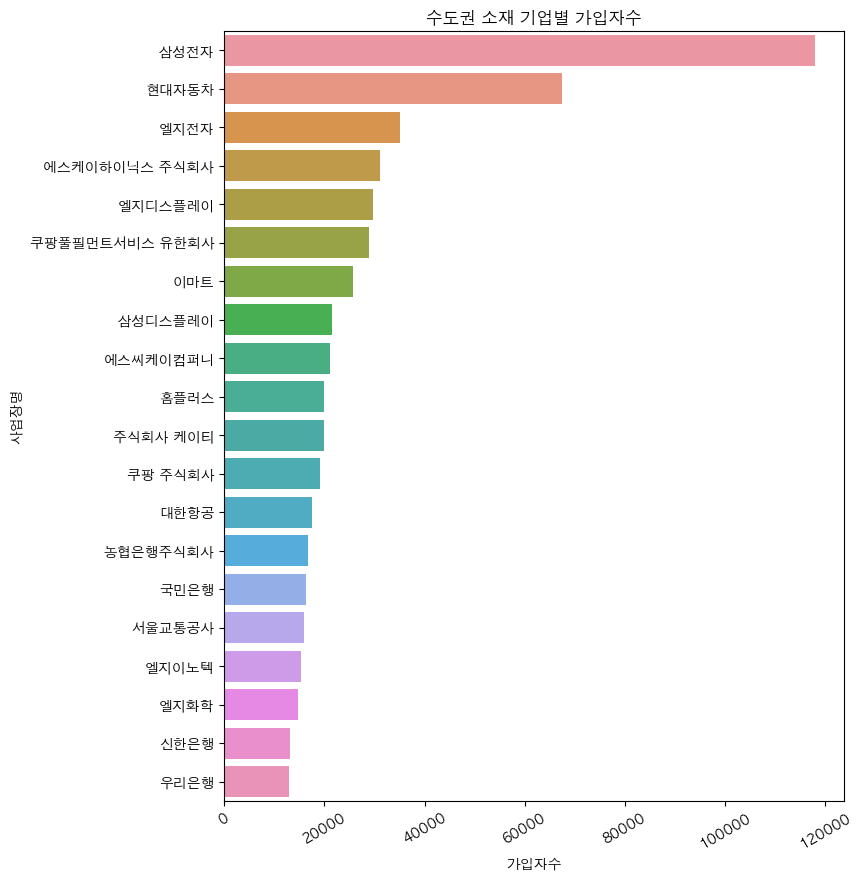

In [55]:
# 코드를 입력해 주세요
plt.figure(figsize=(8, 10))
tmp = df.loc[df['시도코드'].isin([11, 41]), ['사업장명', '가입자수']].sort_values('가입자수', ascending=False).head(20).reset_index()
sns.barplot(y='사업장명', x='가입자수', data=tmp)
plt.xticks(rotation=30)
plt.title('수도권 소재 기업별 가입자수')
plt.show()

### 국민연금 납부액으로 기업별 평균 연봉 추정

국민연금 보험률은 9%입니다. 쉽게 이야기 하면 급여(신고소득월액)의 9%를 국민연금으로 내는 것입니다. 

하지만 이를 절반으로 나누어 **4.5%는 회사가, 나머지 절반은 개인이 부담하는 구조**입니다. 회사는 급여 외에 추가로 금액을 부담합니다.

국민연금 보험료는 **소득 상한선과 하한선이 설정되어 있어 소득 전체가 아닌 일부 소득에만 부과**됩니다.

이를 역산하면 신고소득월액의 계산이 가능합니다. 하지만 **상한선과 하한선이 설정되어 있어 실제보다 과소계산**될 수 있습니다

[수식]

- 인당금액 = 금액 / 가입자수
- 월급여추정 = 인당금액 / 9% * 100%
- 연간급여추정 = 임직원 평균 월급 * 12개월

- 금액을 가입자수로 나눈 금액을 산출하여 `인당금액`을 먼저 산출합니다.
- `월급여추정`은 `인당금액` / 9% * 100% 한 값입니다.
- `월급여추정`을 x12한 값을 `연간급여추정`에 대입합니다.
- `가입자수` 기준 1000명을 초과하는 기업(중견기업)을 필터링 합니다.
- 출력시 `사업장명`, `가입자수`, `월급여추정`, `연간급여추정` 컬럼만 출력합니다.
- `연간급여추정`와 `가입자수`를 기준으로 내림차순하여 상위 10개 기업을 출력합니다.

In [56]:
df.head()

,사업장명,사업자등록번호,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,가입자수,금액,신규,상실
0,우성기전,126811,경기도 광주시 도척면 도척윗로,41,610,330,292201,동력식 수지 공구 제조업,4,899980,0,0
1,서능공원묘지운영회,102820,,41,650,320,701700,화장터 운영 묘지 분양 및 관리업,11,3278020,0,0
2,노들새마을금고,108820,서울특별시 동작구 만양로,11,590,101,659202,신용조합,12,4956440,0,0
3,유창성업,122812,인천광역시 서구 갑문2로,28,260,119,749604,그 외 기타 분류 안된 사업 지원 서비스업(기타임가공,24,5371000,0,0
4,희성전자,106810,서울특별시 용산구 독서당로14길,11,170,131,701201,비주거용 건물 임대업(점포 자기땅),395,187943100,0,1


In [57]:
# 코드를 입력해 주세요
df['인당금액'] = df['금액'] / df['가입자수']
df['월급여추정'] =  df['인당금액'] / 9 * 100
df['연간급여추정'] = df['월급여추정'] * 12

cond = (df['가입자수'] > 1000)
df.sort_values(['연간급여추정', '가입자수'], ascending=False).loc[cond, ['사업장명', '가입자수', '월급여추정', '연간급여추정']].head(10)

,사업장명,가입자수,월급여추정,연간급여추정
6652,기아 영업본부,2563,5529827.9,66357934.7
227092,부산항만산업협회 화물고정업,1094,5517134.3,66205611.2
3429,주식회사 현대케피코,1545,5507191.9,66086303.3
271467,삼성물산건설부문 정규직,4484,5496792.8,65961514.1
200140,삼성디스플레이,21458,5489918.2,65879018.9
6306,기아 정비본부,1272,5487657.2,65851886.8
142430,기아AutoLand화성,12296,5483301.6,65799618.7
3417,삼성에스디에스,11682,5479750.5,65757006.4
96919,기아 AutoLand광주,6815,5473123.4,65677481.2
182394,KB국민카드,1518,5468282.8,65619393.9


### 업종별 가입자수 순유입 산정

- `순유입`은 `신규` - `상실` 로 정의합니다.
- `업종코드명`별 순유입의 합산을 구한 후 상위 20개 `업종코드명`에 대하여 bar 그래프로 출력합니다.
- `순유입` 기준으로 내림차순 정렬합니다.

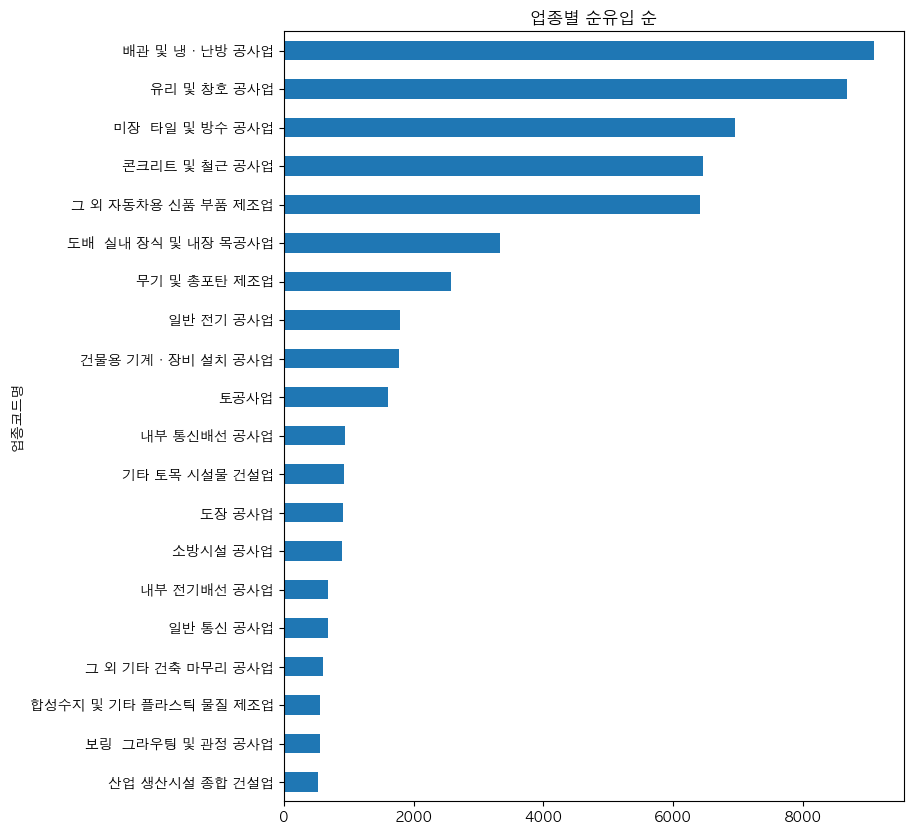

In [60]:
# 코드를 입력해 주세요
plt.figure(figsize=(8, 10))
df['순유입'] = df['신규'] - df['상실']
df.groupby('업종코드명')['순유입'].sum().sort_values(ascending=False).head(20).sort_values().plot(kind='barh')
plt.title('업종별 순유입 순')
plt.show()

### 다음의 기능을 하는 함수를 완성하세요

- 사업자명을 검색한 후 결과를 return하는 함수를 완성합니다.
- 함수명은 `find_company` 입니다.
- 매개변수 contains: 
          True인 경우: string의 `contains`를 사용하여 포함하는 모든 회사를 찾습니다.
          False인 경우: 정확히 일치하는 사업장명만 찾습니다.
          
- `def find_company(company_name, contains)`
- `['사업장명', '월급여추정', '연간급여추정', '업종코드']` 정보를 보여주는 DataFrame을 return 합니다.

In [20]:
df.head()

,사업장명,사업자등록번호,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,가입자수,금액,신규,상실,인당금액,월급여추정,연간급여추정,순유입
0,삼송,116810,서울특별시 서초구 마방로6길,11,650,102,,NaN,164,60165420,2,1,366862.3,4076248.0,48914975.6,1
1,장성,214815,경기도 성남시 분당구 판교로,41,135,107,172902,그 외 기타 분류 안된 섬유제품 제조업,4,1411360,0,1,352840.0,3920444.4,47045333.3,-1
2,특수법인 총포 화약안전기술협회,118820,서울특별시 마포구 마포대로1길,11,440,105,742201,기타 기술 시험 검사 및 분석업,20,7398260,2,0,369913.0,4110144.4,49321733.3,2
3,서울명지초등학교,111820,서울특별시 서대문구 명지2길,11,410,118,999999,BIZ_NO미존재사업장,41,7886200,1,1,192346.3,2137181.6,25646178.9,0
4,삼양건설산업,229810,서울특별시 서초구 동산로,11,650,102,451101,아파트 건설업,62,23659800,1,0,381609.7,4240107.5,50881290.3,1


In [22]:
# 코드를 입력해 주세요
def find_company(company_name, contains):
    if contains:
        return df.loc[df['사업장명'].str.contains(company_name), ['사업장명', '월급여추정', '연간급여추정', '업종코드', '가입자수']]\
              .sort_values('가입자수', ascending=False)
    else:
        return df.loc[df['사업장명']==company_name, ['사업장명', '월급여추정', '연간급여추정', '업종코드', '가입자수']]\
              .sort_values('가입자수', ascending=False)

In [62]:
# 검증코드
find_company('에스케이텔레콤', True)

,사업장명,월급여추정,연간급여추정,업종코드,가입자수
3225,에스케이텔레콤,5386506.9,64638083.2,642001,5270
388606,에스케이텔레콤씨에스티원,3278577.1,39342925.4,924101,67
457287,에스케이텔레콤 주 상용 4단계 운항통신시설 구매설치사업,3823948.7,45887384.6,642001,13
507322,에스케이텔레콤 상용 경북 사업장 형태선LTE R,5530000.0,66360000.0,642001,5
136325,주식회사 에스케이텔레콤봉화대리점,3043722.2,36524666.7,523323,4
252008,에스케이텔레콤 철원동송대리점,3020000.0,36240000.0,515060,4
503453,에스케이텔레콤 주 상용 경부선 추풍령 지천 개량 철도통합무선망 구매설치,4829333.3,57952000.0,642001,3


In [24]:
# 검증코드
find_company('에스케이텔레콤', False)

,사업장명,월급여추정,연간급여추정,업종코드,가입자수
3026,에스케이텔레콤,5360663.7,64327964.8,642001,5298


- 사업장명을 입력하면 사업장명과 정확히 일치하는 회사를 찾습니다. (find_company 함수 사용)
- 함수명은 `compare_company` 입니다.
- 매개변수명은 `company_name` 으로 지정하세요
- `def compare_company(company_name)`

기능
- find_company로 부터 return 된 DataFrame의 업종코드와 동일한 회사를 모두 찾습니다.
- 동일한 회사의 `월급여추정`, `연간급여추정`에 대한 ['mean', 'count', 'min', 'max']를 산출합니다.

return 되는 DataFrame은 다음과 같이 구성합니다.
- index: `월급여추정` -> `업종_월급여추정`, `연간급여추정` -> `업종_연간급여추정`으로 변경합니다.
- 컬럼은 평균, 개수, 최소, 최대로 컬럼명을 변경 후 맨 끝열에는 찾은 회사명 컬럼을 추가하고, `월급여추정`, `연간급여추정` 데이터를 기입합니다.


In [63]:
def company_info(company_name):
    company = find_company(company_name, True)
    return df.loc[company.iloc[0].name]

In [64]:
info = company_info('에스케이텔레콤')
info

사업장명            에스케이텔레콤
사업자등록번호          104813
주소         서울특별시 중구 을지로
시도코드                 11
시군구코드               140
읍면동코드               105
업종코드             642001
업종코드명       무선 및 위성 통신업
가입자수               5270
금액           2554820240
신규                   24
상실                   78
인당금액           484785.6
월급여추정         5386506.9
연간급여추정       64638083.2
순유입                 -54
Name: 3225, dtype: object

In [65]:
# 코드를 입력해 주세요
def compare_company(company_name):
    company = find_company(company_name, True)
    code = company['업종코드'].iloc[0]
    df1 =df.loc[df['업종코드'] == code, ['월급여추정', '연간급여추정']].agg(['mean', 'count', 'min', 'max'])
    df1.columns = ['업종_월급여추정', '업종_연간급여추정']
    df1 = df1.T
    df1.columns = ['평균', '개수', '최소', '최대']
    df1.loc['업종_월급여추정', company_name] = company['월급여추정'].values[0]
    df1.loc['업종_연간급여추정', company_name] = company['연간급여추정'].values[0]
    return df1

In [67]:
# 검증코드
result = compare_company('삼성전자')
result

,평균,개수,최소,최대,삼성전자
업종_월급여추정,3170029.0,273.0,484994.9,5489918.2,5405548.8
업종_연간급여추정,38040348.1,273.0,5819939.4,65879018.9,64866586.0


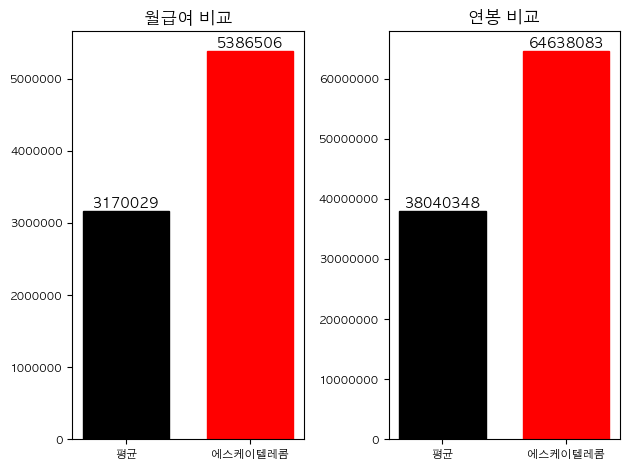

In [68]:
fig, ax = plt.subplots(1, 2)

p1 = ax[0].bar(x=['평균', '에스케이텔레콤'], height=(result.iloc[0, 0], info['월급여추정']), width=0.7)
ax[0].bar_label(p1, fmt='%d')
p1[0].set_color('black')
p1[1].set_color('red')
ax[0].ticklabel_format(style='plain', axis='y')
ax[0].set_title('월급여 비교')

p2 = ax[1].bar(x=['평균', '에스케이텔레콤'], height=(result.iloc[1, 0], info['연간급여추정']), width=0.7)
p2[0].set_color('black')
p2[1].set_color('red')
ax[1].bar_label(p2, fmt='%d')
ax[1].ticklabel_format(style='plain', axis='y')
ax[1].set_title('연봉 비교')

ax[0].tick_params(axis='both', which='major', labelsize=8, rotation=0)
ax[0].tick_params(axis='both', which='minor', labelsize=6)
ax[1].tick_params(axis='both', which='major', labelsize=8)
ax[1].tick_params(axis='both', which='minor', labelsize=6)

plt.tight_layout()

In [69]:
# 검증코드
compare_company('현대자동차')

,평균,개수,최소,최대,현대자동차
업종_월급여추정,3438728.5,173.0,1412383.6,5529827.9,5270905.7
업종_연간급여추정,41264742.2,173.0,16948602.7,66357934.7,63250868.5


In [70]:
# 검증코드
compare_company('버킷플레이스')

,평균,개수,최소,최대,버킷플레이스
업종_월급여추정,2717856.2,52261.0,350000.0,5530000.0,4222412.6
업종_연간급여추정,32614274.8,52261.0,4200000.0,66360000.0,50668951.7


In [71]:
# 검증코드
compare_company('무신사')

,평균,개수,최소,최대,무신사
업종_월급여추정,3299384.1,5810.0,350000.0,5530000.0,4098412.2
업종_연간급여추정,39592608.7,5810.0,4200000.0,66360000.0,49180946.3
